In [14]:
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import os
!pip install split-folders
import splitfolders
from PIL import Image as img
import cv2 
import numpy as np

In [2]:
img = cv2.imread('/home/aakib/Downloads/casting/archive/casting_512x512/casting_512x512/def_front') 

In [3]:
def summarize_diagnostics(history):
    # plot loss
    plt.style.use("ggplot")
    plt.figure()
    N = epochs
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(loc="upper left")
    # plot accuracy
    plt.style.use("ggplot")
    plt.figure()
    N = epochs
    plt.plot(np.arange(0, N), history.history["accuracy"], label="accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    # save plot to file

In [4]:
print("Class ok_front train count:",len(os.listdir('/home/aakib/Downloads/casting/archive/casting_data/casting_data/train/ok_front')))
print("Class def_front train count:",len(os.listdir('/home/aakib/Downloads/casting/archive/casting_data/casting_data/train/def_front')) )

print("Class def_front test count:",len(os.listdir('/home/aakib/Downloads/casting/archive/casting_data/casting_data/test/ok_front')))
print("Class ok_front test count:",len(os.listdir('/home/aakib/Downloads/casting/archive/casting_data/casting_data/test/def_front')))

Class ok_front train count: 2875
Class def_front train count: 3758
Class def_front test count: 262
Class ok_front test count: 453


In [5]:
splitfolders.ratio("/home/aakib/Downloads/casting/archive/casting_data/casting_data/train/", output="output", seed=1337, ratio=(.9, .1), group_prefix=None)

Copying files: 6633 files [01:44, 63.34 files/s] 


In [6]:
print("Class ok_front train count:",len(os.listdir('./output/train/ok_front')))
print("Class def_front train count:",len(os.listdir('./output/train/def_front')) )

print("Class ok_front train count:",len(os.listdir('./output/val/ok_front')))
print("Class def_front train count:",len(os.listdir('./output/val/def_front')) )

Class ok_front train count: 2587
Class def_front train count: 3382
Class ok_front train count: 288
Class def_front train count: 376


In [7]:
IMAGE_DIMS = (224, 224, 3)
train_data_dir = './output/train/'
validation_data_dir = './output/val/'
batch_size=64

In [8]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)


Found 5969 images belonging to 2 classes.
Found 664 images belonging to 2 classes.


In [9]:
nb_train_samples =5969 
nb_validation_samples = 664

In [10]:
def define_model(h,w):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same', input_shape=(h,w, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='softmax'))
    return model

In [12]:
model = define_model(IMAGE_DIMS[0],IMAGE_DIMS[1])
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
epochs = 8
batch_size = 64
checkpoint = ModelCheckpoint("./weights.h5",monitor="loss",mode="min",save_best_only = True,verbose=1)
callbacks = [checkpoint]
history = model.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
93/93 [==============================] - ETA: 0s - loss: 1.3256 - accuracy: 0.5536
Epoch 00001: loss improved from inf to 1.32559, saving model to ./weights.h5
93/93 [==============================] - 278s 3s/step - loss: 1.3256 - accuracy: 0.5536 - val_loss: 0.6646 - val_accuracy: 0.7125
Epoch 2/8
93/93 [==============================] - ETA: 0s - loss: 0.6316 - accuracy: 0.6484
Epoch 00002: loss improved from 1.32559 to 0.63164, saving model to ./weights.h5
93/93 [==============================] - 281s 3s/step - loss: 0.6316 - accuracy: 0.6484 - val_loss: 0.6407 - val_accuracy: 0.6000
Epoch 3/8
93/93 [==============================] - ETA: 0s - loss: 0.5027 - accuracy: 0.7526
Epoch 00003: loss improved from 0.63164 to 0.50273, saving model to ./weights.h5
93/93 [==============================] - 284s 3s/step - loss: 0.5027 - accuracy: 0.7526 - val_loss: 0.4676 - val_accuracy: 0.8203
Epoch 4/8
93/93 

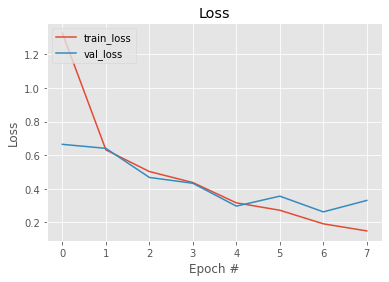

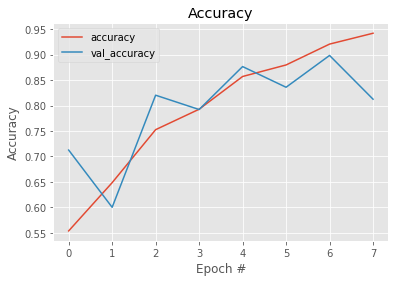

In [15]:
summarize_diagnostics(history)


In [19]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_data_dir= '/home/aakib/Downloads/casting/archive/casting_data/casting_data/test/'
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 715 images belonging to 2 classes.


In [20]:
model.load_weights("weights.h5")
class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
 

Instructions for updating:
Please use Model.predict, which supports generators.


Confusion Matrix
[[450   3]
 [ 98 164]]
Classification Report
              precision    recall  f1-score   support

   def_front       0.82      0.99      0.90       453
    ok_front       0.98      0.63      0.76       262

    accuracy                           0.86       715
   macro avg       0.90      0.81      0.83       715
weighted avg       0.88      0.86      0.85       715



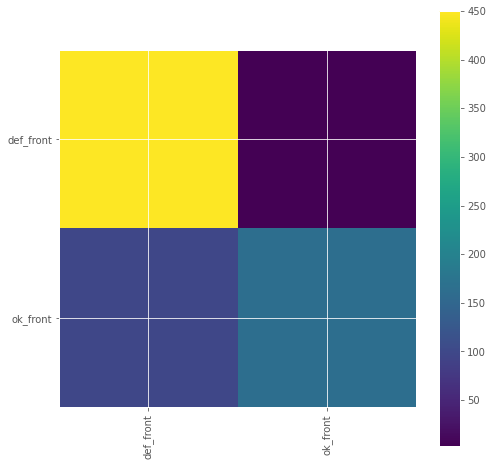

In [21]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(test_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)